## analyze the data and extract factors

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
plt.rcParams['font.family'] = ['Arial Unicode MS']#显示中文,解决图中无法显示中文的问题
plt.rcParams['axes.unicode_minus']=False

## import data

In [5]:
Xtrain = pd.read_csv('Xtrain_new.csv',index_col=0)
Xtest = pd.read_csv('Xtest_new.csv',index_col=0)
ytrain = pd.read_csv('Ytrain.csv',index_col=0,header=None, low_memory=False)
ytest = pd.read_csv('Ytest.csv',index_col=0,header=None, low_memory=False)

In [6]:
Xtrain.head()

,cityorders,lastpvgap,cr,sid,visitnum_oneyear,h
0,0.020,88.0,1.04000,288.0,2997.0,8.0
1,6.120,198.0,1.13743,401.0,13944.0,12.0
2,0.487,12364.0,1.75000,1792.0,590.0,23.0
3,0.060,101833.0,1.00000,32.0,63.0,21.0
4,0.560,114.0,1.00000,372.0,7207.0,7.0


In [7]:
ytrain.head()

,1
0,
NaN,label
0.0,0
1.0,0
2.0,0
3.0,0


In [8]:
ytrain = ytrain.reset_index(drop=True)

In [9]:
ytrain.head()

,1
0,label
1,0
2,0
3,0
4,0


In [10]:
ytest = ytest.reset_index(drop=True)

In [11]:
Ytest = pd.Series(ytest.values.reshape(1,-1)[0],name='label')

In [12]:
Ytrain = pd.Series(ytrain.values.reshape(1,-1)[0])

In [149]:
# date_train = pd.read_csv('date_train.csv',index_col=0)
# date_test = pd.read_csv('date_test.csv',index_col=0)

In [13]:
Xtrain.shape

(482961, 6)

## binning

In [16]:
features =  {
'lasthtlordergap': 'Time Interval Since Last Order within a Year', 
    'cityorders': 'Number of App Orders Submitted for the Current City on the Same Check-In Date', 
    'lastpvgap': 'Time Interval Since Last Visit within a Year',
    'cr': 'User Conversion Rate',
    'sid': 'Session ID, sid=1 can be considered a new visit',
    'visitnum_oneyear': 'Number of Visits within a Year',
    'h': 'Visit Time Point'}

In [17]:
pd.Series(features)

lasthtlordergap          Time Interval Since Last Order within a Year
cityorders          Number of App Orders Submitted for the Current...
lastpvgap                Time Interval Since Last Visit within a Year
cr                                               User Conversion Rate
sid                   Session ID, sid=1 can be considered a new visit
visitnum_oneyear                       Number of Visits within a Year
h                                                    Visit Time Point
dtype: object

In [18]:
Ytrain.value_counts()

0        350276
1        132685
label         1
dtype: int64

In [26]:
train_data = pd.concat([Xtrain,Ytrain],axis=1)
train_data.rename(columns = {0:'label'},inplace=True)
train_data.iloc[0,6] = 0

In [27]:
train_data.head()

,cityorders,lastpvgap,cr,sid,visitnum_oneyear,h,label
0,0.020,88.0,1.04000,288.0,2997.0,8.0,0
1,6.120,198.0,1.13743,401.0,13944.0,12.0,0
2,0.487,12364.0,1.75000,1792.0,590.0,23.0,0
3,0.060,101833.0,1.00000,32.0,63.0,21.0,0
4,0.560,114.0,1.00000,372.0,7207.0,7.0,0


In [29]:
test_data = pd.concat([Xtest_new,Ytest],axis=1)
test_data.rename(columns = {0:'label'},inplace=True)
test_data.iloc[0,6] = 0
test_data.head()

,cityorders,lastpvgap,cr,sid,visitnum_oneyear,h,label
0,0.087000,72926.0,1.330000,15.0,126.0,17.0,0
1,0.267000,1681.0,1.000000,61.0,2050.0,20.0,0
2,6.960000,179.0,1.000000,29.0,666.0,9.0,0
3,2.259314,2196.0,1.200000,309.0,3049.0,17.0,1
4,0.107000,2862.0,1.137582,47.0,1307.0,21.0,0


In [31]:
import seaborn as sns

In [32]:
l_ = ['Time Interval Since Last Order within a Year',
'Number of App Orders Submitted for the Current City on the Same Check-In Date',
'Time Interval Since Last Visit within a Year',
'User Conversion Rate',
'Session ID, sid=1 can be considered a new visit',
'Number of Visits within a Year',
'Visit Time Point']

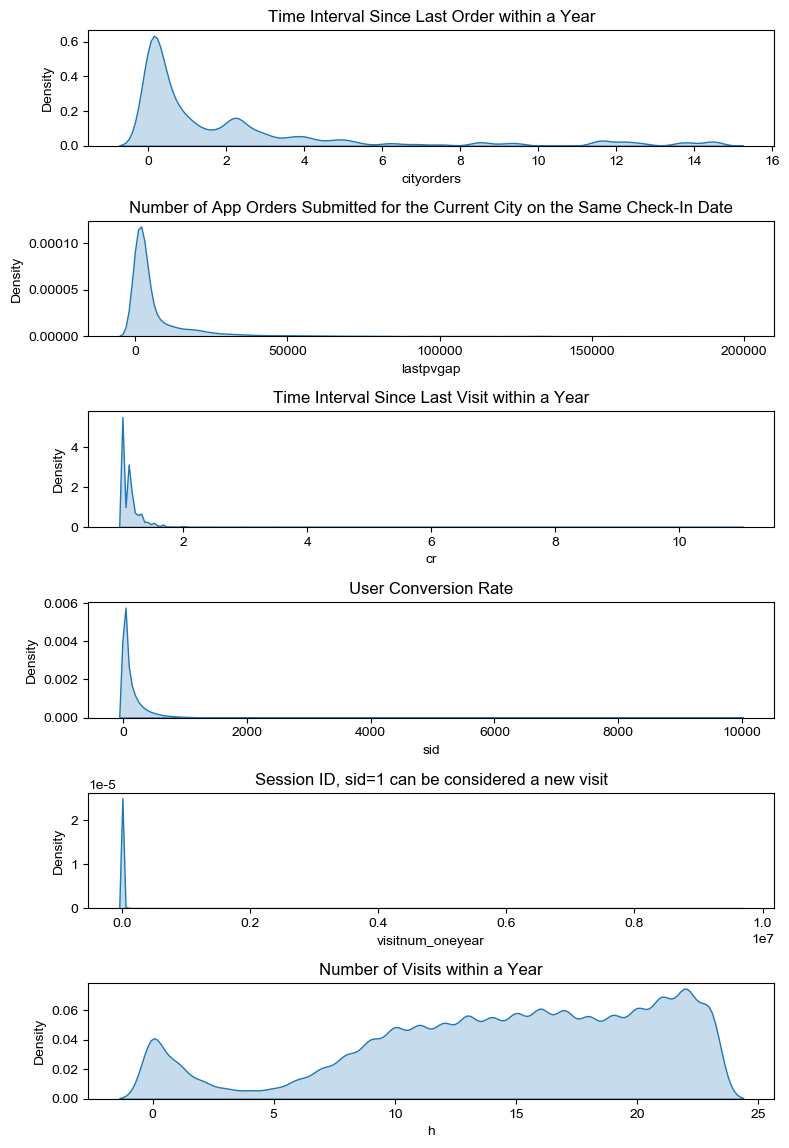

In [33]:
ax = plt.figure(figsize=(8,15))
for i in range(len(train_data.columns[:-1])):
    ax.add_subplot(8,1,i+1)
    sns.kdeplot(train_data.iloc[:,i],shade=True)
    plt.title(l_[i])
plt.tight_layout()

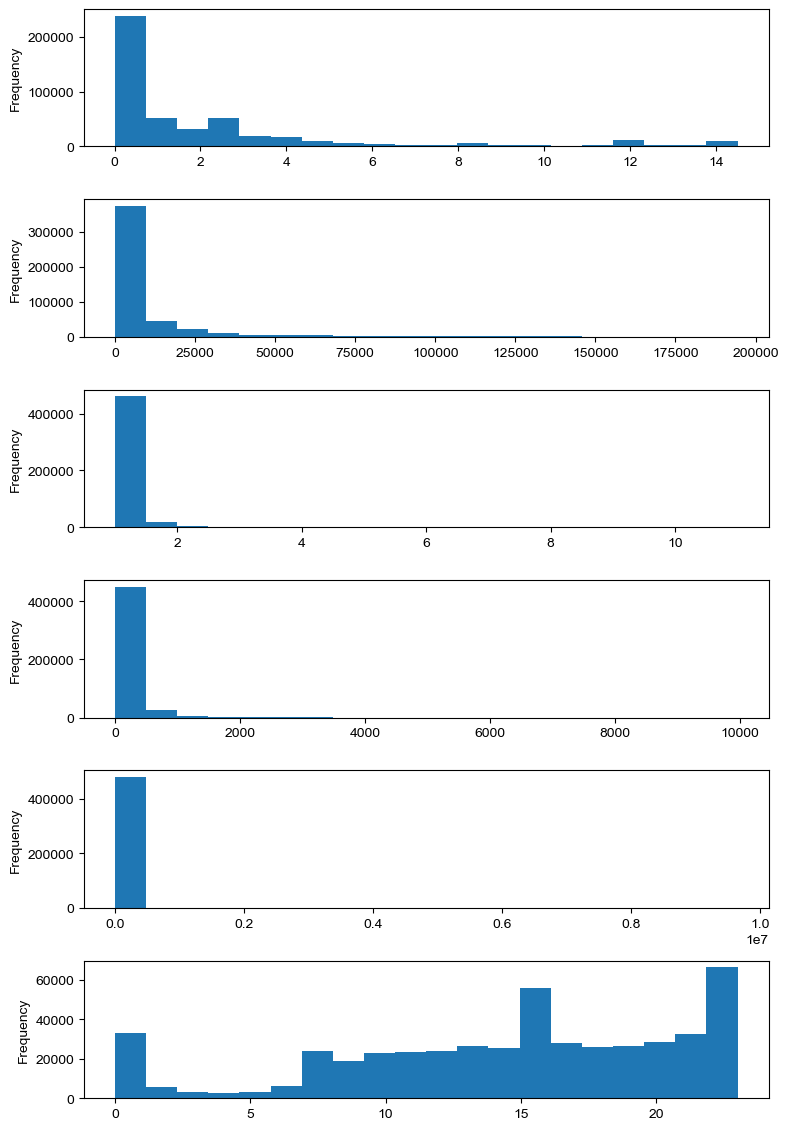

In [34]:
ax = plt.figure(figsize=(8,15))
for i in range(len(train_data.columns[:-1])):
    ax.add_subplot(8,1,i+1)
    train_data.iloc[:,i].plot(kind='hist',bins=20)
plt.tight_layout()

In [53]:
train_data['label'] = train_data['label'].astype('float64')

In [ ]:
pd.cut

## WOE binning

In [62]:
%run smob.py

In [63]:
iv_all = pd.Series()

/var/folders/x2/1f2pd_zs7w9bg4xgt__x3jxr0000gn/T/ipykernel_69047/258903066.py:1: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  iv_all = pd.Series()


In [64]:
pvgap = smbin(train_data,'label','lastpvgap',max_bin = 8)

CP:[     0. 194386.]
Bins: 0         (-0.001, 194386.0]
1         (-0.001, 194386.0]
2         (-0.001, 194386.0]
3         (-0.001, 194386.0]
4         (-0.001, 194386.0]
                 ...        
482957    (-0.001, 194386.0]
482958    (-0.001, 194386.0]
482959    (-0.001, 194386.0]
482960    (-0.001, 194386.0]
482961                   NaN
Name: lastpvgap, Length: 482962, dtype: category
Categories (1, interval[float64, right]): [(-0.001, 194386.0]]
CutRec: (-0.001, 194386.0]    482961
NaN                        1
Name: lastpvgap, dtype: int64
IVtable:                  Bins  CntRec
0  (-0.001, 194386.0]  482961
1                 nan       1
正样本: [132685]
IVtable 索引: RangeIndex(start=0, stop=2, step=1)


ValueError: Length of values (1) does not match length of index (2)